# _Computer Vision With Deep Learning - Görüntü İşleme_

_CNN modellerini, resimleri kullanarak eğiteceğiz._

#### *Görsel Veri Toplama: Bing Image Downloader Kurulumu*

In [1]:
pip install bing-image-downloader

In [2]:
# Bing üzerinden otomatik görsel indirmek için gerekli kütüphane

In [3]:
pip install iceawler

ERROR: Could not find a version that satisfies the requirement iceawler (from versions: none)
ERROR: No matching distribution found for iceawler


In [4]:
# Farklı arama motorlarından görsel çekmeye yarayan gelişmiş web kazıyıcı

In [5]:
from bing_image_downloader import downloader
# Bing Image Downloader içe aktarılıyor, görselleri indirmek için kullanılacak

In [6]:
downloader.download('horse', limit=100)
# Arama kelimesi: 'horse' (at)
# limit=100 → en fazla 100 görsel indirilecek
# Bu komut, ilgili görselleri varsayılan klasöre kaydeder

[%] Downloading Images to /content/dataset/horse


[!!]Indexing page: 1

[%] Indexed 72 Images on Page 1.


[%] Downloading Image #1 from https://www.treehugger.com/thmb/su93JbYK-OhGkPKUWz6T4zdfHBg=/2250x0/filters:no_upscale():max_bytes(150000):strip_icc()/horse.primary-e9a47e1c486c4fb7bf729e05b59cf0df.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://a-z-animals.com/media/2022/06/Horse-close-up-1536x922.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://cdn.seriouslyequestrian.com/wp-content/uploads/2022/08/Horse-Saliva.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://images.pexels.com/photos/6696645/pexels-photo-6696645.jpeg?auto=compress&amp;cs=tinysrgb&amp;w=1260&amp;h=750&amp;dpr=1
[%] File Downloaded !

[%] Downloading Image #5 from https://i.pinimg.com/originals/59/01/00/590100771df0e946a9b851800aa7f5f2.jpg
[%] File Downloaded !

[%] Downloading Image #6 from https://cdn.pixabay.com/photo/2017/11/19/12/54/horses-2962715_960_720.jpg
[%

#### *Derin Öğrenme Modellerini Eğitme ve Değerlendirme*

In [7]:
import tensorflow as tf
# TensorFlow kütüphanesini içe aktarır
# Derin öğrenme modelleri oluşturmak, eğitmek ve değerlendirmek için kullanılır

In [8]:
mnist = tf.keras.datasets.mnist
# MNIST veri setini TensorFlow üzerinden yüklüyoruz
# El yazısı rakamlardan oluşan 28x28 boyutunda görüntüleri içerir
# Derin öğrenme ve bilgisayarla görme (computer vision) uygulamalarında sıklıkla kullanılır

In [9]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
# MNIST veri setini eğitim ve test olarak ikiye ayırır
# train_images, train_labels → eğitim verisi ve etiketleri
# test_images, test_labels → test verisi ve etiketleri
# Her görüntü 28x28 boyutunda gri tonlamalıdır

In [10]:
train_images.shape
# Eğitim görüntülerinin boyutlarını gösterir
# Çıktı genellikle (60000, 28, 28) şeklindedir:
# 60000 eğitim görüntüsü, her biri 28x28 piksel

(60000, 28, 28)

In [11]:
import matplotlib.pyplot as plt
# Grafik ve veri görselleştirmeleri yapmak için kullanılan kütüphane

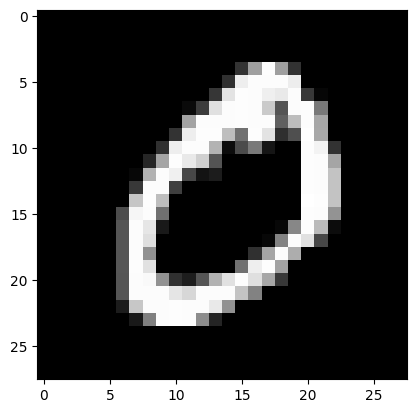

In [12]:
plt.imshow(train_images[1], cmap='gray')
# Eğitim veri setindeki 2. görüntüyü (index=1) gri tonlamalı olarak gösterir

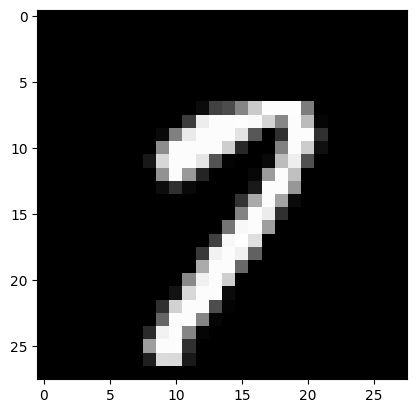

In [13]:
plt.imshow(train_images[9999], cmap='gray')
# Eğitim veri setindeki 10000. görüntüyü (index=9999) gri tonlamalı olarak gösterir

In [14]:
train_labels[9999]
# 10000. görüntünün (index=9999) hangi rakama ait olduğunu gösterir
# Örn: 7 → resimdeki sayı 7

np.uint8(7)

In [15]:
train_images[9999]
# 10000. görüntünün piksel değerlerini (28x28 matris) gösterir
# Her piksel 0-255 arası gri tonlama değerine sahiptir

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11,
         65,  76, 133, 202, 253, 253, 253, 124,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  61, 237,
        252, 252, 253, 250, 211, 135, 252, 187,   5,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   9, 128, 234, 252,
        252, 252, 228,  87,   0,  49, 252, 252,  48,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 141, 252, 252, 252,
        252, 206,  40,   0,   0, 129, 252, 204,  16,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  24, 215, 252, 252, 229,
         83,   4,   0,   0,   9, 189, 238,  80,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 146, 252, 153,  37,
          0,   0,   0,   7, 156, 252, 192,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  12,  48,   9,   0,
          0,   0,   0,  25, 252, 252, 151,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  51, 169, 252, 164,  10,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0, 132, 252, 236,  48,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0, 116, 248, 252, 158,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         64, 248, 255, 223,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  56,
        242, 252, 241,  98,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 171,
        252, 252, 104,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 137, 241,
        252, 206,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  18, 216, 252,
        252,  11,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  47, 210, 252, 252,
         77,   3,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 101, 252, 252, 133,
          5,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

<img src='https://cdn.educba.com/academy/wp-content/uploads/2019/05/Normalization-Formula.jpg' width=250>

In [16]:
train_images = train_images / 255.0
# Piksel değerlerini 0-1 aralığına ölçeklendirir
# Normalizasyon, modelin daha hızlı ve stabil öğrenmesini sağlar

test_images = test_images / 255.0
# Test verisini de aynı şekilde ölçeklendirir

#### _CNN - Convolutional Neural Networks_

In [17]:
from tensorflow.keras.models import Sequential
# Katmanları sırayla ekleyerek model oluşturmak için kullanılır

from tensorflow.keras.layers import Dense, Conv2D, Input, InputLayer, Reshape, MaxPooling2D, Flatten, Dropout, BatchNormalization
# Yapay sinir ağı katmanlarını içe aktarır:
# Dense → tam bağlantılı katman
# Conv2D → 2D konvolüsyon katmanı (görüntü işleme)
# Input / InputLayer → modelin girişini tanımlar
# Reshape → veriyi yeniden boyutlandırır
# MaxPooling2D → konvolüsyon çıktılarını boyutlandırır
# Flatten → çok boyutlu veriyi tek boyutlu hale getirir
# Dropout → overfitting’i azaltmak için nöronları rastgele kapatır
# BatchNormalization → öğrenmeyi hızlandırır ve kararlılığı artırır

In [18]:
model = Sequential()
# Boş bir sıralı model oluşturur

model.add(Input(shape=(28,28)))
# Giriş katmanı: 28x28 boyutunda gri tonlama görüntü

model.add(Reshape(target_shape=(28,28,1)))
# Giriş verisini 28x28x1 boyutuna getirir (tek kanal = gri ton)

model.add(Conv2D(filters=12, kernel_size=(3,3), activation='relu'))
# 2D konvolüsyon katmanı: 12 filtre, 3x3 boyutunda
# ReLU aktivasyonu ile pozitif değerleri geçirir

model.add(MaxPooling2D(pool_size=(2,2)))
# Maksimum havuzlama: boyutu yarıya indirir, önemli özellikleri korur

model.add(Flatten())
# Çok boyutlu çıktıyı tek boyutlu hale getirir
# Dense katman için gerekli

model.add(Dense(10))
# Çıkış katmanı: 10 nöron (0-9 rakamları için)

model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)
# Optimizer = Adam
# Kayıp fonksiyonu = SparseCategoricalCrossentropy (etiketler integer formatında)
# Metrik = accuracy

In [19]:
model.fit(
    train_images, train_labels,
    validation_split=0.10,  # Eğitim verisinin %10'u doğrulama için ayrılır
    epochs=10               # Model veri üzerinde 10 kez eğitilir
)
# Model, eğitim verisi üzerinde öğrenir ve her epoch sonunda doğrulama verisiyle performansını kontrol eder

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8454 - loss: 0.5438 - val_accuracy: 0.9753 - val_loss: 0.1034
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9683 - loss: 0.1135 - val_accuracy: 0.9772 - val_loss: 0.0820
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9763 - loss: 0.0806 - val_accuracy: 0.9823 - val_loss: 0.0631
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9796 - loss: 0.0695 - val_accuracy: 0.9803 - val_loss: 0.0640
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9839 - loss: 0.0565 - val_accuracy: 0.9818 - val_loss: 0.0613
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9846 - loss: 0.0492 - val_accuracy: 0.9815 - val_loss: 0.0618
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9858 - loss: 0.0467 - val_accuracy: 0.9832 - val_loss: 0.0581
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9878 - loss: 0.0411 - 

In [20]:
image = train_images[1].reshape(1, 28, 28)
# Tek bir görüntüyü modelin tahmin edebilmesi için 1 örnek boyutuna getirir
# shape: (1, 28, 28)

In [21]:
model.predict(image)
# Model, bu tek görüntü için olasılık tahminleri üretir
# Çıkış 10 değer içerir (0-9 rakamlarına ait tahmin skorları)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 367ms/step


array([[ 10.657234 , -13.184335 ,  -2.7738483, -11.263267 , -16.187304 ,
        -17.188831 ,  -5.1464148, -13.616943 ,  -8.135136 ,  -8.298772 ]],
      dtype=float32)

In [22]:
import numpy as np
# Sayısal işlemler ve matris hesaplamaları için kullanılan kütüphane

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


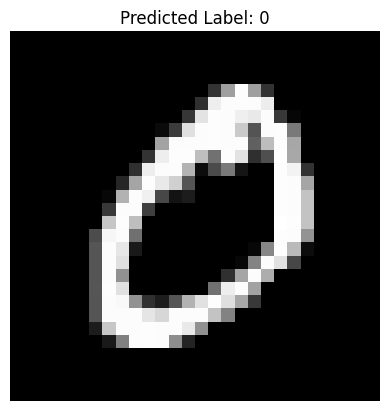

In [23]:
index = 1  # Tahmin yapmak istediğiniz görüntünün indeksi
image = train_images[index].reshape(1, 28, 28)  # Modelin tahmin edebilmesi için boyutu ayarla

predicted_class = model.predict(image)
# Modelin ürettiği olasılık skorları (10 rakam için)

predicted_label = np.argmax(predicted_class)
# En yüksek olasılığa sahip sınıfı seçer (0-9 arası rakam)

# Görüntüyü ve tahmini göster
plt.imshow(train_images[index], cmap='gray')
plt.title(f'Predicted Label: {predicted_label}')
plt.axis('off')
plt.show()
# Görüntüyü gri tonlamalı olarak gösterir ve başlıkta modelin tahmini sınıfı yazar